## Individual Species Seed Match Heatmap
This program produces a seed match heatmap for each species. 

In [2]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import imageio
from numpy import loadtxt

def extract_latin_name(name):
    cut = None
    if " genes" in name:    
        cut = name.split(" genes")[0]
    return cut if cut!=None else name

SIZE = 7
# Set font and ensure text is not LaTeX-rendered


In [3]:
def sequence_count(string, dictionary, length):
    for i in range(len(string)-(length-1)):
        temp_seq = string[i:i+length]
        dictionary[temp_seq]+= 1
    return dictionary

In [4]:
def format_data(filename):
    # Read in the file
    with open("transcripts/"+filename+".txt", 'r') as file :
        filedata = file.readlines()

    outdata = ""
    for i in filedata:
        if '>' in i:
            outdata+="\n"+i
        else:
            outdata+=i.strip()
        
    
    # Write the file out again
    with open(filename+".txt", 'w') as file:
        file.write(outdata)
        
    # Read in the file
    with open(filename+".txt", 'r') as file :
        filedata = file.read()

    # Replace the target string
    filedata = filedata.replace('Sequence unavailable', 'Sequence_unavailable')

    # Write the file out again
    with open(filename+".txt", 'w') as file:
        file.write(filedata)

In [12]:
def print_map(filename, map_):
    df=pd.DataFrame(map_)
    df.to_csv("maps/"+filename+'.csv', index= False, header = False)

In [13]:
def create_map(filename):
    # Read in the file
    with open("Genome Data/"+filename+".txt", 'r') as file :
        filedata = file.read()

    # Replace the target string
    filedata = filedata.replace('Sequence unavailable', 'Sequence_unavailable')

    # Write the file out again
    with open("Genome Data/"+filename+".txt", 'w') as file:
        file.write(filedata)
    
    data = loadtxt("Genome Data/"+filename+".txt", comments=">",dtype="str")
    
    data = list(data)
    
    #create empty dict
    df = pd.read_csv("AGTC-7seq.csv", header = None)
    data_arr = np.array(df).flatten()
    data_dict = {data_arr[i]: 0 for i in range(0, len(data_arr))}
    
    allowed_char = 'AGCT'
    
    #1) Update the dictionary:
    for i in data:
        if all(ch in allowed_char for ch in i):
            data_dict= sequence_count(i,data_dict, SIZE)


    #2) Convert dictionary back into 1D array
    data_arr1 = np.array(list(data_dict.values()))
    
    #Convert 1D array back into a 2D array
    data_arr2 = np.reshape(data_arr1, (2**SIZE,2**SIZE))

    #save the map as a csv
    print_map(filename+'_map', data_arr2)
    

In [15]:
filenames = [
    #invertabrates
    ('Caenorhabditis elegans (PRJNA13758) genes (WBcel235)','Roundworm (Caenorhabditis elegans)'),
    ('Drosophila melanogaster (Fruit fly) genes (BDGP6.46)','Fruit fly (Drosophila melanogaster)'),
    ("Caenorhabditis briggsae genes","Roundworm (Caenorhabditis briggsae)"),
    ("Drosophila ananassae genes","Fruit fly (Drosophila ananassae)"),
    ("Drosophila mojavensis genes","Fruit fly (Drosophila mojavensis)"),
    ("Drosophila simulans genes","Fruit fly (Drosophila simulans)"),
    ("Drosophila yakuba genes","Fruit fly (Drosophila yakuba)"),
    ("Ciona intestinalis genes","Sea Squirt (Ciona intestinalis)"),
    ("Branchiostoma floridae genes","Florida lancelet (Branchiostoma floridae)"),
    ("Strongylocentrotus purpuratus genes","Purple sea urchin (Strongylocentrotus purpuratus)"),
    ("Octopus bimaculoides (California two-spot octopus, UCB-OBI-ISO-001)","California two-spot octopus (Octopus bimaculoides)"),
    #vertabrates
    ('Lamprey genes (Pmarinus_7.0)','Sea Lamprey (Petromyzon marinus)'),
    ('Hagfish genes (Eburgeri_3.2)','Inshore hagfish (Eptatretus burgeri)'),
    ('Elephant shark genes (Callorhinchus_milii-6.1.3)','Australian ghostshark (Callorhinchus milii)'),
    ('Spotted gar genes (LepOcu1)','Spotted gar (Lepisosteus oculatus)'),
    ('Zebrafish genes (GRCz11)','Zebrafish (Danio rerio)'),
    ('Atlantic cod genes (gadMor3.0)','Cod (Gadus morhua)'),
    ('Coelacanth genes (LatCha1)','Coelacanth (Latimeria chalumnae)'),
    ('Tropical clawed frog genes (Xenopus_tropicalis_v9.1)','Tropical clawed frog (Xenopus tropicalis)'),
    ('Tuatara genes (ASM311381v1)','Tuatara (Sphenodon punctatus)'),
    ('Green anole genes (AnoCar2.0v2)','Green anole lizard (Anolis carolinensis)'),
    ('Painted turtle genes (Chrysemys_picta_bellii-3.0.3)','Western painted turtle (Chrysemys picta bellii)'),
    ('Zebra finch genes (bTaeGut1_v1.p)','Zebra finch (Taeniopygia guttata)'),
    ('Chicken (maternal Broiler) genes (bGalGal1.mat.broiler.GRCg7b)','Chicken (Gallus gallus)'),
    ('Platypus genes (mOrnAna1.p.v1)','Platypus (Ornithorhynchus anatinus)'),
    ('Opossum genes (ASM229v1)','Gray short-tailed opossum (Monodelphis domestica)'),
    ('Armadillo genes (Dasnov3.0)','Nine-banded armadillo (Dasypus novemcinctus)'),
    ('Cow genes (ARS-UCD1.2)','Cow (Bos taurus)'),
    ('Dog genes (ROS_Cfam_1.0)','Dog (Canis familiaris)'),
    ('Rabbit genes (OryCun2.0)','Rabbit (Oryctolagus cuniculus)'),
    ('Guinea Pig genes (Cavpor3.0)','Guinea pig (Cavia porcellus)'),
    ('Rat genes (mRatBN7.2)','Norway rat (Rattus norvegicus)'),
    ('Mouse genes (GRCm39)','House mouse (Mus musculus)'),
    ('Human genes (GRCh38.p13)','Human (Homo sapiens)')
]

In [24]:
for i in filenames:
    create_map(i[0])

/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_49837/1883115363.py:13: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Please see the 1.23 release notes for an example on how to do this.  If you wish to ignore this warning, use `warnings.filterwarnings`.  This warning is expected to be removed in the future and is given only once per `loadtxt` call.
  data = loadtxt("Genome Data/"+filename+".txt", comments=">",dtype="str")
/var/folders/wd/wcjpwvbx6ql2slnp2p7cvn2m0000gn/T/ipykernel_49837/1883115363.py:13: UserWarning: Input line 1 contained no data and will not be counted towards `max_rows=50000`.  This differs from the behaviour in NumPy <=1.22 which counted lines rather than rows.  If desired, the previous behaviour can be achieved by using `itertools.islice`.
Pl

In [3]:
filenames = [
'all_species_genomes',
'Abingdon island giant tortoise genes (ASM359739v1)',
'African ostrich genes (ASM69896v1)',
'Algerian mouse genes (SPRET_EiJ_v1)',
#'Alpaca genes (vicPac1)',
'Alpine marmot genes (marMar2.1)',
'Amazon molly genes (Poecilia_formosa-5.1.2)',
'American bison genes (Bison_UMD1.0)',
'American black bear genes (ASM334442v1)',
'American mink genes (NNQGG.v01)',
'Arabian camel genes (CamDro2)',
'Arctic ground squirrel genes (ASM342692v1)',
'Argentine black and white tegu genes (HLtupMer3)',
'Armadillo genes (Dasnov3.0)',
'Asian bonytongue genes (fSclFor1.1)',
'Atlantic cod genes (gadMor3.0)',
'Atlantic herring genes (Ch_v2.0.2)',
#'Atlantic salmon genes (Ssal_v3.1)',
'Australian saltwater crocodile genes (CroPor_comp1)',
'Ballan wrasse genes (BallGen_V1)',
'Barramundi perch genes (ASB_HGAPassembly_v1)',
'Beluga whale genes (ASM228892v3)',
'Bicolor damselfish genes (Stegastes_partitus-1.0.2)',
'Black snub-nosed monkey genes (ASM169854v1)',
'Blue whale genes (mBalMus1.v2)',
'Blue-ringed sea krait genes (latLat_1.0)',
'Bolivian squirrel monkey genes (SaiBol1.0)',
'Bonobo genes (panpan1.1)',
'Brown trout genes (fSalTru1.1)',
'Burtons mouthbrooder genes (AstBur1.0)',
'Bushbaby genes (OtoGar3)',
'C.intestinalis genes (KH)',
'C.savignyi genes (CSAV 2.0)',
'Caenorhabditis elegans genes (WBcel235)',
'Capuchin genes (Cebus_imitator-1.0)',
'Cat genes (Felis_catus_9.0)',
'Chacoan peccary genes (CatWag_v2_BIUU_UCD)',
'Channel bull blenny genes (fCotGob3.1)',
'Channel catfish genes (IpCoco_1.2)',
'Chimpanzee genes (Pan_tro_3.0)',
'Chinese hamster CHOK1GS genes (CHOK1GS_HDv1)',
'Chinese medaka genes (ASM858656v1)',
'Chinese softshell turtle genes (PelSin_1.0)',
'Chinook salmon genes (Otsh_v1.0)',
'Climbing perch genes (fAnaTes1.2)',
'Clown anemonefish genes (AmpOce1.0)',
'Coelacanth genes (LatCha1)',
'Coho salmon genes (Okis_V2)',
'Collared flycatcher genes (FicAlb1.5)',
'Common canary genes (SCA1)',
'Common carp genes (common_carp_genome)',
'Common wall lizard genes (PodMur_1.0)',
'Common wombat genes (bare-nosed_wombat_genome_assembly)',
'Coquerels sifaka genes (Pcoq_1.0)',
'Cow genes (ARS-UCD1.2)',
'Crab-eating macaque genes (Macaca_fascicularis_6.0)',
'Degu genes (OctDeg1.0)',
'Denticle herring genes (fDenClu1.1)',
'Dingo genes (ASM325472v1)',
'Dog genes (ROS_Cfam_1.0)',
#'Dolphin genes (turTru1)',
'Domestic yak genes (LU_Bosgru_v3.0)',
'Donkey genes (ASM303372v1)',
'Drill genes (Mleu.le_1.0)',
'Drosophila melanogaster genes (BDGP6.32)',
'Duck genes (CAU_duck1.0)',
'Eastern brown snake genes (EBS10Xv2-PRI)',
'Eastern happy genes (fAstCal1.2)',
'Electric eel genes (Ee_SOAP_WITH_SSPACE)',
#'Elephant genes (Loxafr3.0)',
'Elephant shark genes (Callorhinchus_milii-6.1.3)',
'Eurasian red squirrel genes (mSciVul1.1)',
'European seabass genes (dlabrax2021)',
'Ferret genes (MusPutFur1.0)',
'Fugu genes (fTakRub1.2)',
'Giant panda genes (ASM200744v2)',
'Gibbon genes (Nleu_3.0)',
'Gilthead seabream genes (fSpaAur1.1)',
'Goat genes (ARS1)',
'Golden Hamster genes (MesAur1.0)',
'Golden eagle genes (bAquChr1.2)',
'Golden snub-nosed monkey genes (Rrox_v1)',
'Golden-line barbel genes (SAMN03320097.WGS_v1.1)',
'Goldfish genes (ASM336829v1)',
'Goodes thornscrub tortoise genes (rGopEvg1_v1.p)',
'Gorilla genes (gorGor4)',
'Great Tit genes (Parus_major1.1)',
'Greater amberjack genes (Sdu_1.0)',
#'Greater bamboo lemur genes (Prosim_1.0)',
'Greater horseshoe bat genes (mRhiFer1_v1.p)',
'Green anole genes (AnoCar2.0v2)',
'Guinea Pig genes (Cavpor3.0)',
'Guppy genes (Guppy_female_1.0_MT)',
'Hagfish genes (Eburgeri_3.2)',
#'Hedgehog genes (eriEur1)',
'Horse genes (EquCab3.0)',
'Huchen genes (ASM331708v1)',
'Hybrid - Bos Indicus genes (UOA_Brahman_1)',
#'Hyrax genes (proCap1)',
'Indian cobra genes (Nana_v5)',
'Indian medaka genes (Om_v0.7.RACA)',
'Japanese medaka HdrR genes (ASM223467v1)',
'Japanese quail genes (Coturnix_japonica_2.0)',
'Javanese ricefish genes (OJAV_1.1)',
'Kakapo genes (bStrHab1_v1.p)',
'Kangaroo rat genes (Dord_2.0)',
'Koala genes (phaCin_unsw_v4.1)',
'Lamprey genes (Pmarinus_7.0)',
'Large yellow croaker genes (L_crocea_2.0)',
'Leishan spiny toad genes (ASM966780v1)',
'Leopard genes (PanPar1.0)',
'Lesser Egyptian jerboa genes (JacJac1.0)',
#'Lesser hedgehog tenrec genes (TENREC)',
'Lion genes (PanLeo1.0)',
'Long-tailed chinchilla genes (ChiLan1.0)',
'Lumpfish genes (fCycLum1.pri)',
'Lyretail cichlid genes (NeoBri1.0)',
'Mas night monkey genes (Anan_2.0)',
'Macaque genes (Mmul_10)',
'Mainland tiger snake genes (TS10Xv2-PRI)',
'Makobe Island cichlid genes (PunNye1.0)',
'Mallard genes (ASM874695v1)',
'Mangrove rivulus genes (ASM164957v1)',
'Medium ground-finch genes (GeoFor_1.0)',
#'Megabat genes (pteVam1)',
'Mexican tetra genes (Astyanax_mexicanus-2.0)',
'Microbat genes (Myoluc2.0)',
'Midas cichlid genes (Midas_v5)',
'Mouse Lemur genes (Mmur_3.0)',
'Mummichog genes (Fundulus_heteroclitus-3.0.2)',
'Naked mole-rat female genes (HetGla_female_1.0)',
'Narwhal genes (NGI_Narwhal_1)',
'Nile tilapia genes (O_niloticus_UMD_NMBU)',
'Northern American deer mouse genes (HU_Pman_2.1)',
'Northern pike genes (Eluc_v4)',
'Olive baboon genes (Panubis1.0)',
'Opossum genes (ASM229v1)',
'Orange clownfish genes (Nemo_v1)',
'Painted turtle genes (Chrysemys_picta_bellii-3.0.3)',
'Paramormyrops kingsleyae genes (PKINGS_0.1)',
'Pig - Bamei genes (Bamei_pig_v1)',
'Pig - Berkshire genes (Berkshire_pig_v1)',
'Pig - Duroc genes (Sscrofa11.1)',
'Pig - Hampshire genes (Hampshire_pig_v1)',
'Pig - Jinhua genes (Jinhua_pig_v1)',
'Pig - Landrace genes (Landrace_pig_v1)',
'Pig - Largewhite genes (Large_White_v1)',
'Pig - Meishan genes (Meishan_pig_v1)',
'Pig - Pietrain genes (Pietrain_pig_v1)',
'Pig - Rongchang genes (Rongchang_pig_v1)',
'Pig - Tibetan genes (Tibetan_Pig_v2)',
'Pig - Wuzhishan genes (minipig_v1.0)',
'Pig USMARC genes (USMARCv1.0)',
'Pig genes (Sscrofa11.1)',
'Pig-tailed macaque genes (Mnem_1.0)',
#'Pika genes (OchPri2.0-Ens)',
'Pike-perch genes (SLUC_FBN_1)',
'Pinecone soldierfish genes (fMyrMur1.1)',
'Pink-footed goose genes (ASM259213v1)',
'Platyfish genes (X_maculatus-5.0-male)',
'Platypus genes (mOrnAna1.p.v1)',
'Polar bear genes (UrsMar_1.0)',
'Prairie vole genes (MicOch1.0)',
'Rabbit genes (OryCun2.0)',
'Red fox genes (VulVul2.2)',
'Red-bellied piranha genes (Pygocentrus_nattereri-1.0.2)',
'Reedfish genes (fErpCal1.1)',
'Ryukyu mouse genes (CAROLI_EIJ_v1.1)',
#'Saccharomyces cerevisiae genes (R64-1-1)',
'Sailfin molly genes (P_latipinna-1.0)',
'Sheep (texel) genes (Oar_v3.1)',
'Sheep genes (Oar_rambouillet_v1.0)',
'Sheepshead minnow genes (C_variegatus-1.0)',
#'Shrew genes (sorAra1)',
'Shrew mouse genes (PAHARI_EIJ_v1.1)',
'Siamese fighting fish genes (fBetSpl5.2)',
'Siberian musk deer genes (MosMos_v2_BIUU_UCD)',
#'Sloth genes (choHof1)',
'Sooty mangabey genes (Caty_1.0)',
'Sperm whale genes (ASM283717v2)',
'Spiny chromis genes (ASM210954v1)',
'Spotted gar genes (LepOcu1)',
'Squirrel genes (SpeTri2.0)',
'Steppe mouse genes (MUSP714)',
'Stickleback genes (BROAD S1)',
'Sumatran orangutan genes (Susie_PABv2)',
'Tarsier genes (Tarsius_syrichta-2.0.1)',
'Tetraodon genes (TETRAODON 8.0)',
'Three-toed box turtle genes (T_m_triunguis-2.0)',
'Tiger genes (PanTig1.0)',
'Tiger tail seahorse genes (H_comes_QL1_v1)',
'Tongue sole genes (Cse_v1.0)',
#'Tree Shrew genes (tupBel1)',
'Tropical clawed frog genes (Xenopus_tropicalis_v9.1)',
'Tuatara genes (ASM311381v1)',
'Turbot genes (ASM1334776v1)',
'Turkey genes (Turkey_5.1)',
'Turquoise killifish genes (Nfu_20140520)',
'Blind mole rat genes (S.galili_v1.0)',
'Vaquita genes (mPhoSin1.pri)',
'Vervet-AGM genes (ChlSab1.1)',
#'Wallaby genes (Meug_1.0)',
'White-tufted-ear marmoset genes (mCalJac1.pat.X)',
'Wild yak genes (BosGru_v2.0)',
'Yarkand deer genes (CEY_v1)',
'Yellowtail amberjack genes (Sedor1)',
'Zebra finch genes (bTaeGut1_v1.p)',
'Zebra mbuna genes (M_zebra_UMD2a)',
'Zig-zag eel genes (fMasArm1.2)',
'Chicken (maternal Broiler) genes (bGalGal1.mat.broiler.GRCg7b)',
'Human genes (GRCh38.p13)',
'Mouse genes (GRCm39)',
'Rat genes (mRatBN7.2)',
'Zebrafish genes (GRCz11)'
    ]


In [8]:
def create_heatmap(filename, title):
    #load map
    data_arr2 = pd.read_csv("maps/"+filename+"_map.csv")

    #standardized the data with mean and std, then putting it through a sigmoid function 
    def sigmoid(x):
        e = np.exp(1)
        y = 1/(1+e**(-x))
        return y

    data_arr2 = (data_arr2 - data_arr2.mean())/(data_arr2.std())

    data_arr2 = sigmoid(data_arr2)

    #font
    font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
    plt.rc('font', **font)
    plt.rcParams['svg.fonttype'] = 'none'
    fig = plt.figure(figsize=(8,8))
    plt.imshow(data_arr2,cmap="inferno")
    plt.title(title, fontsize=20)
    plt.xticks(ticks=[], labels=[])
    plt.yticks(ticks=[], labels=[])
    plt.savefig("seed_match_heatmap_raster/"+filename+".svg",bbox_inches='tight', format = 'svg')
    plt.show()

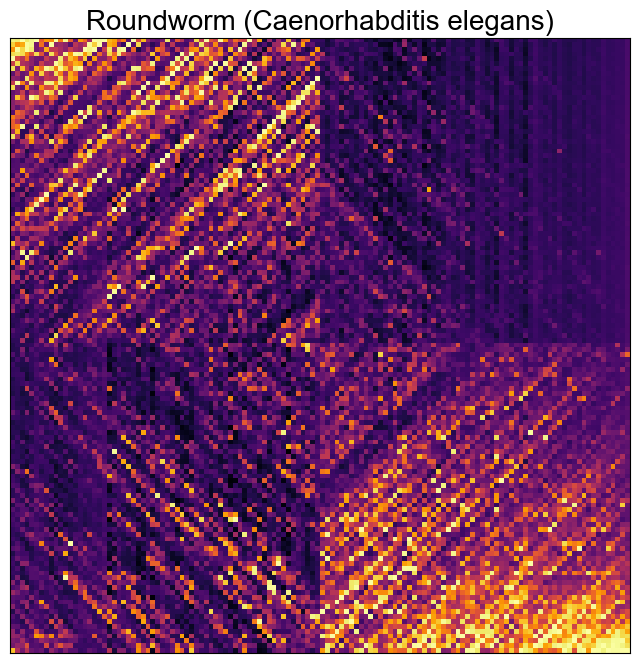

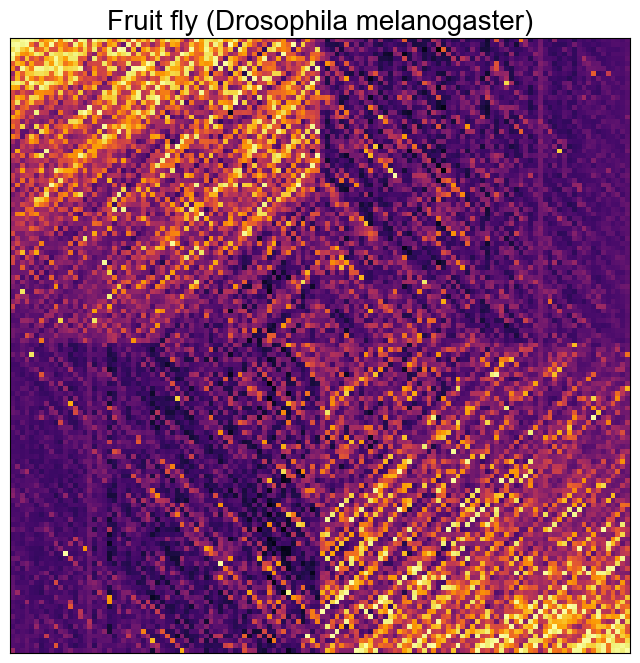

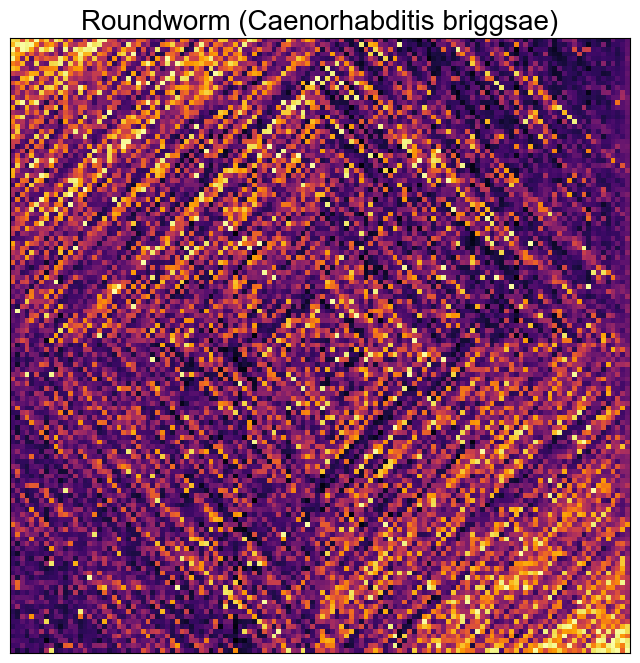

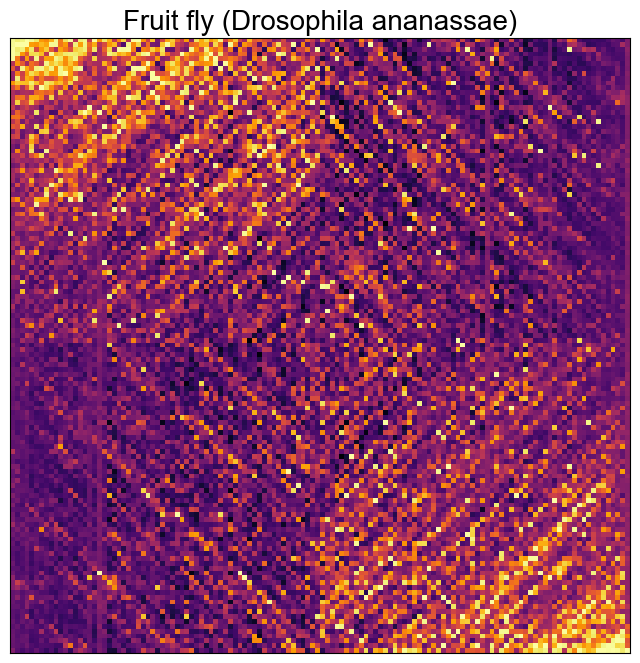

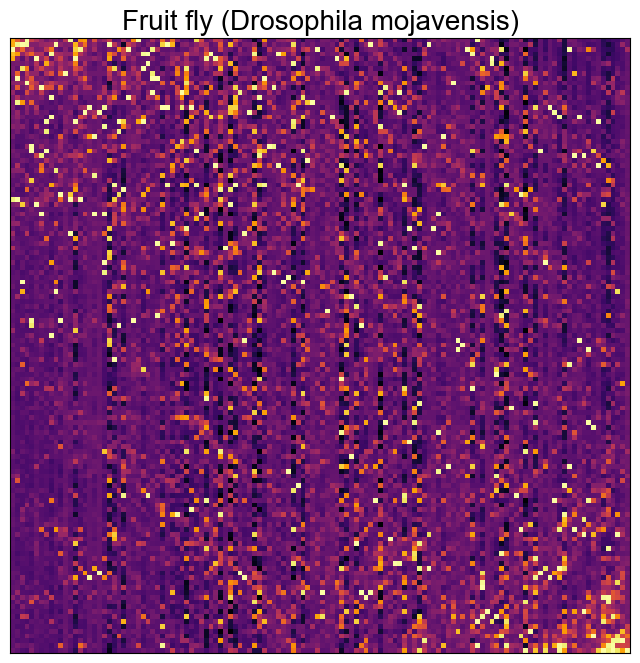

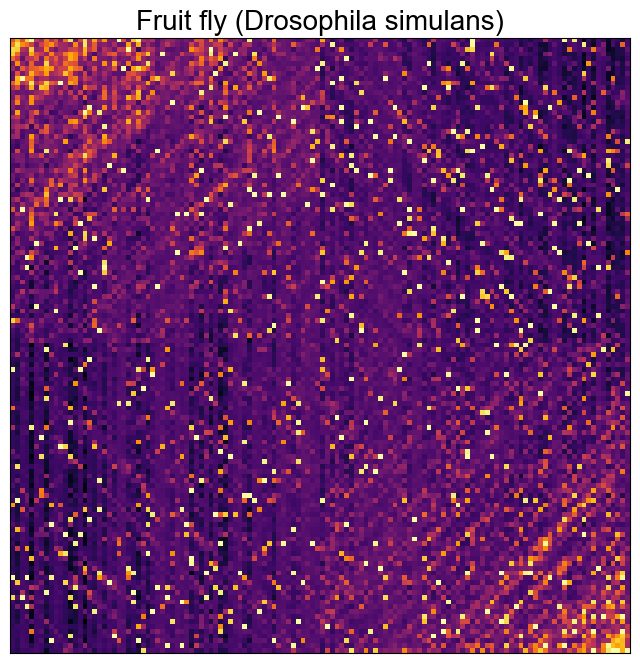

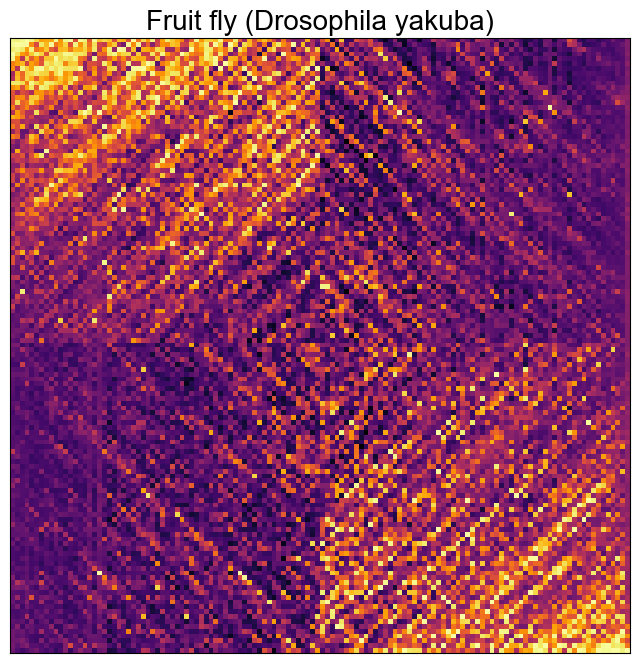

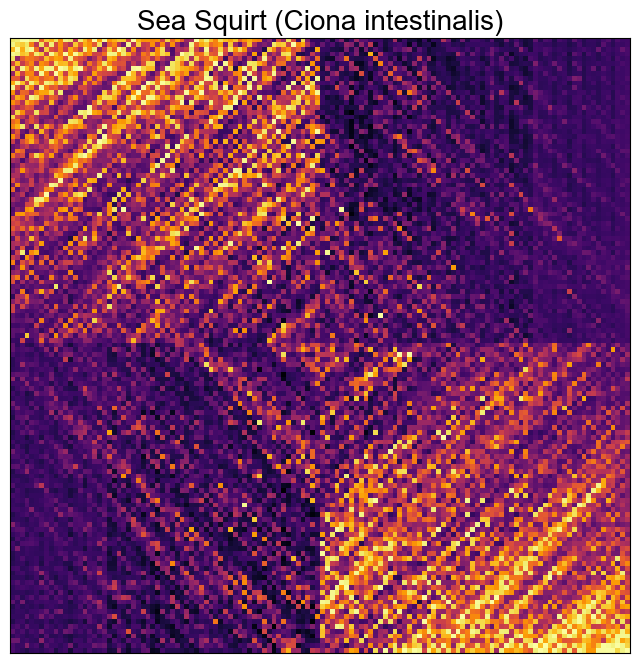

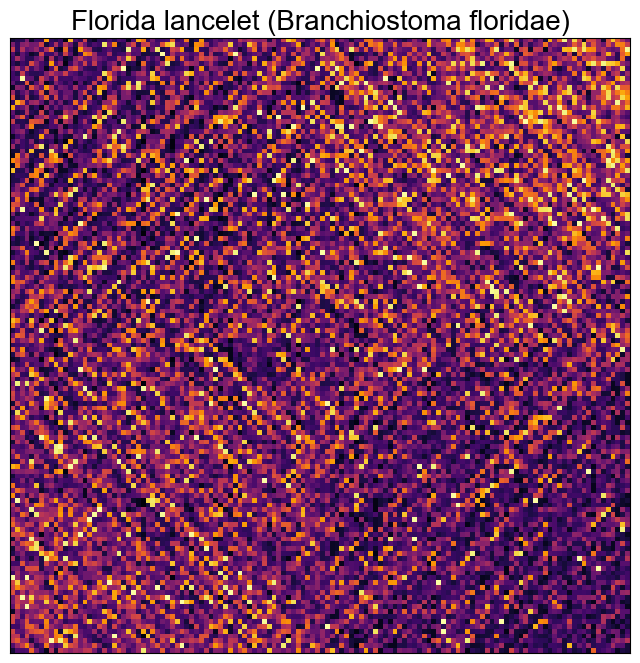

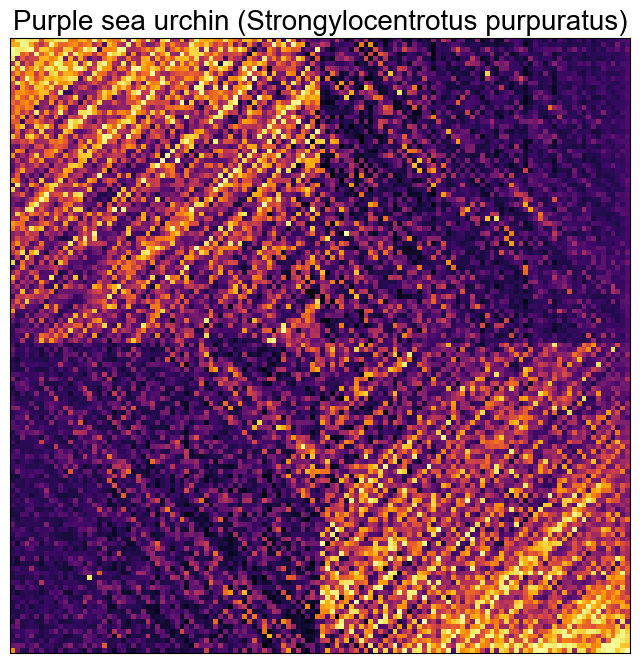

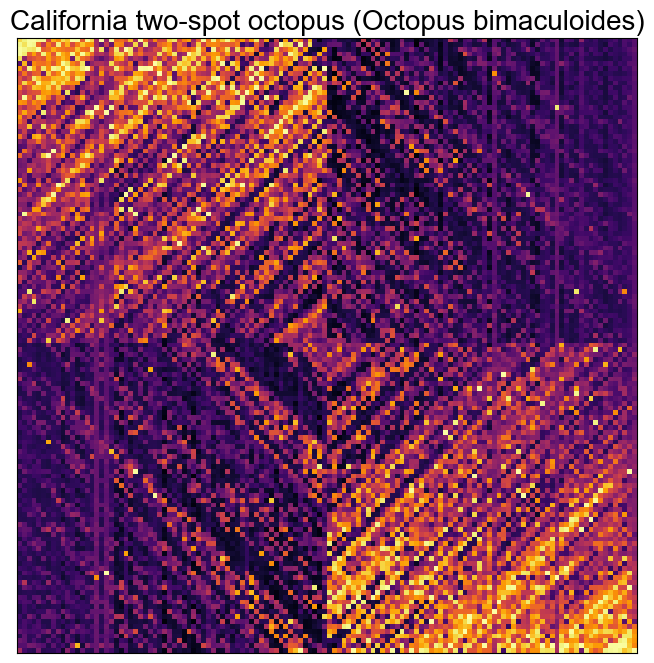

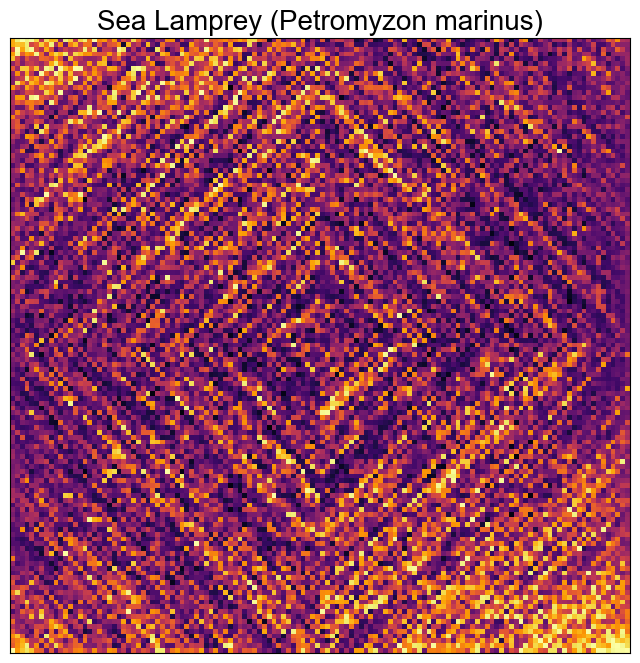

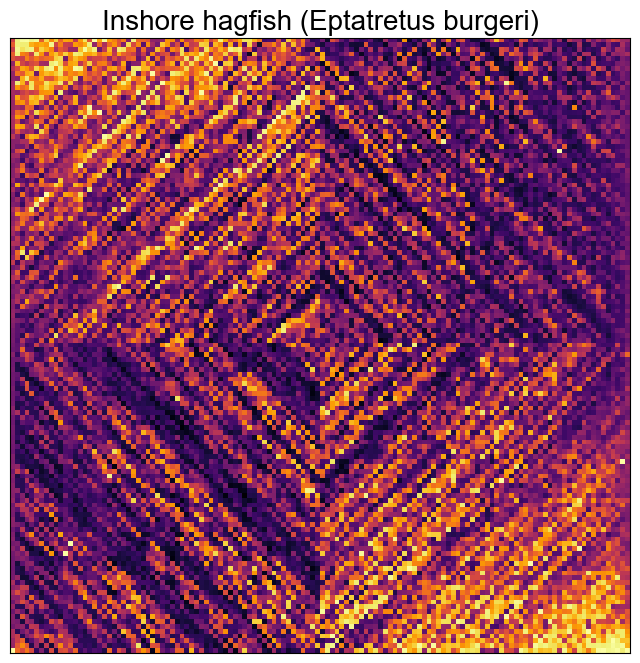

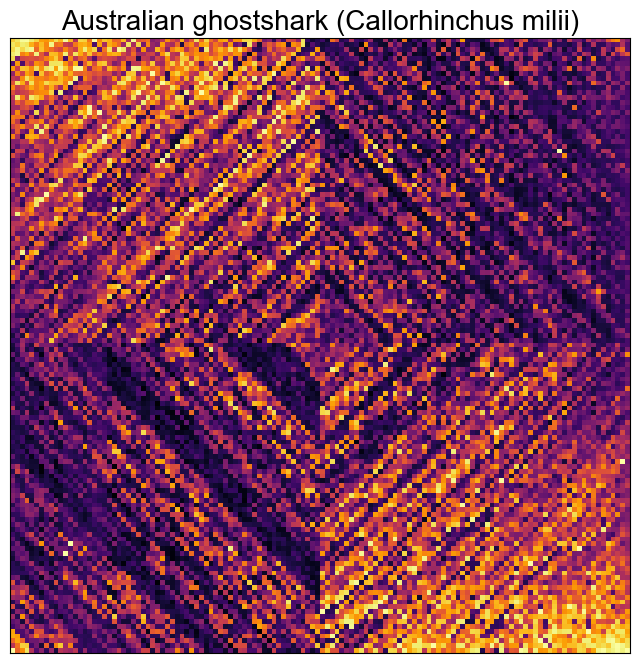

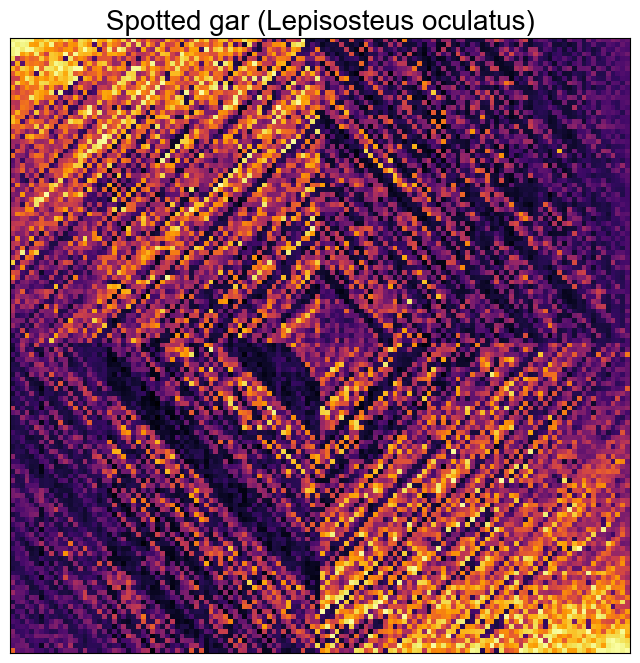

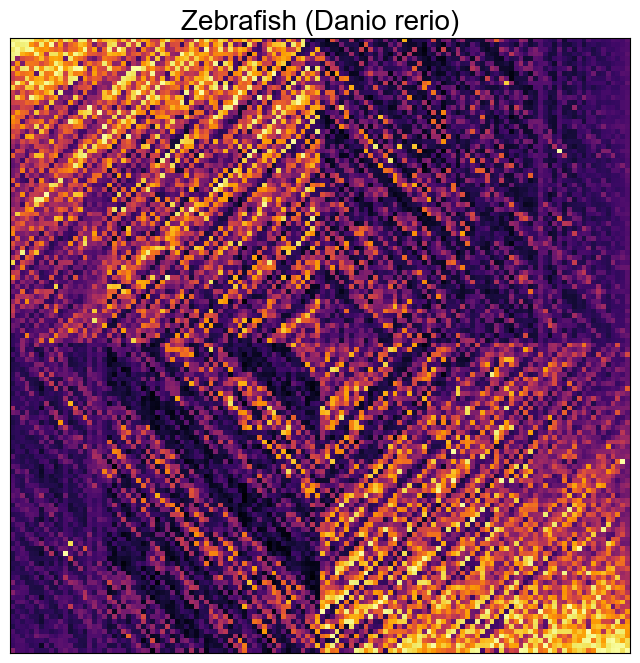

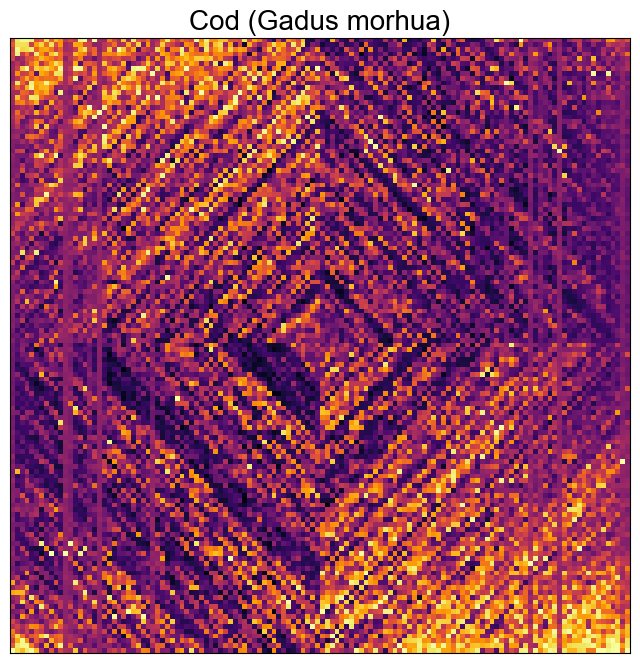

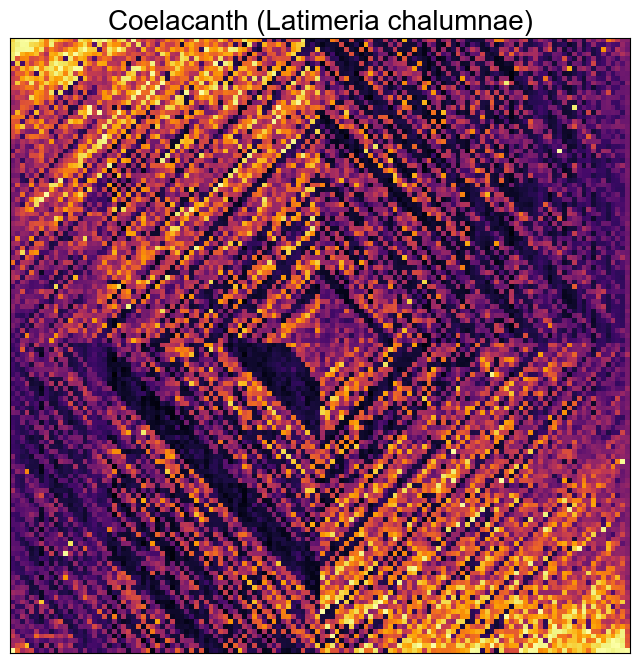

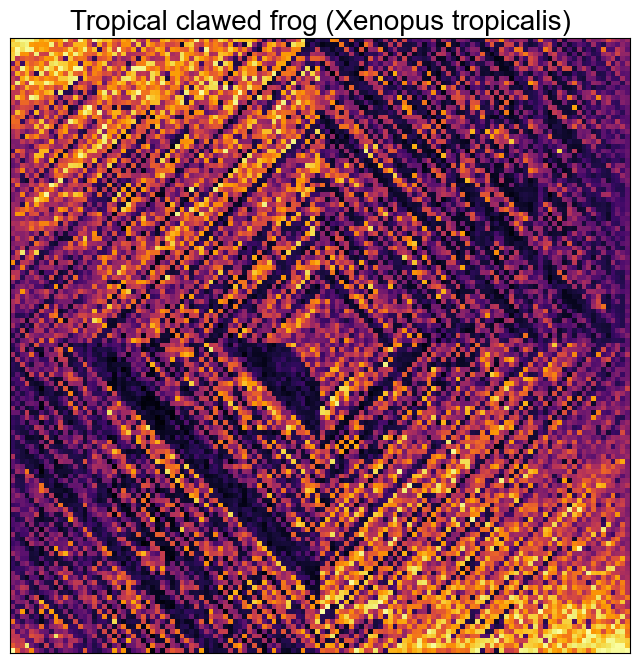

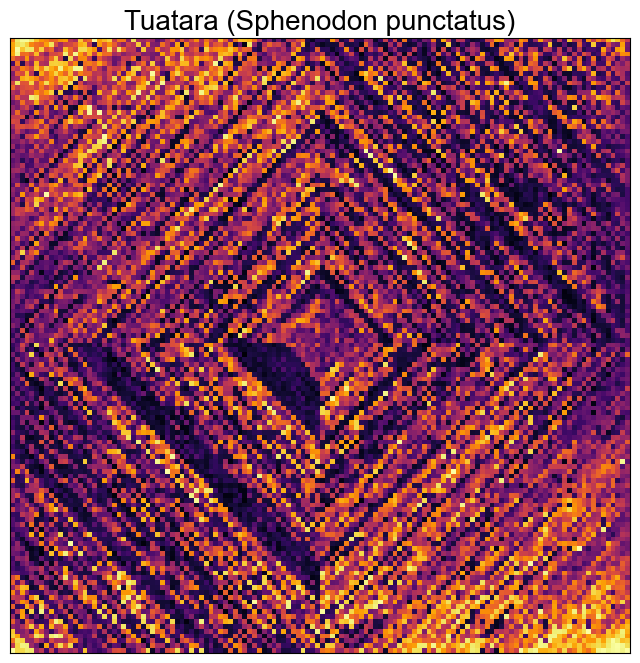

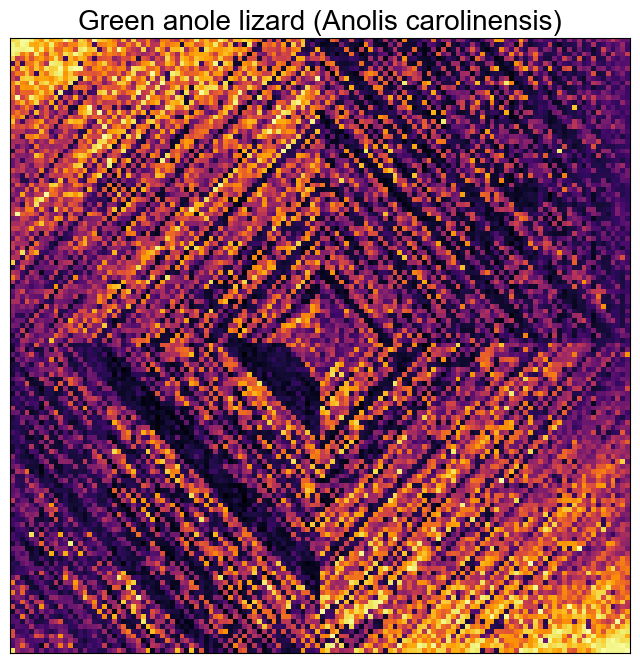

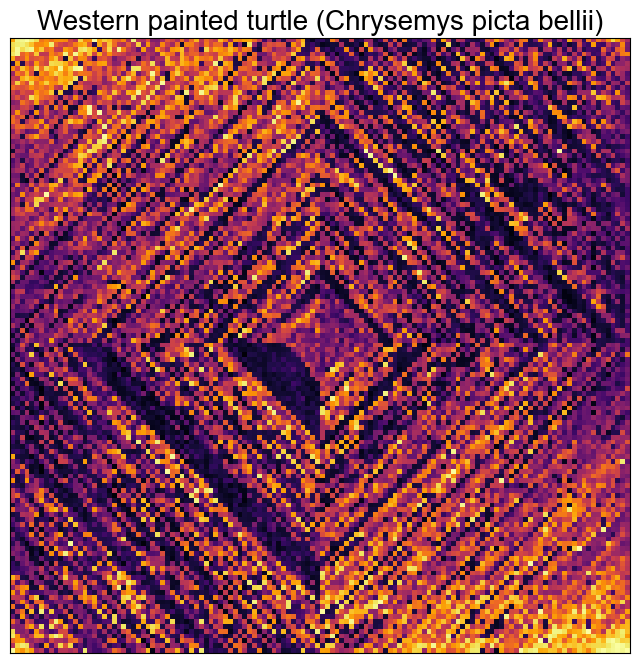

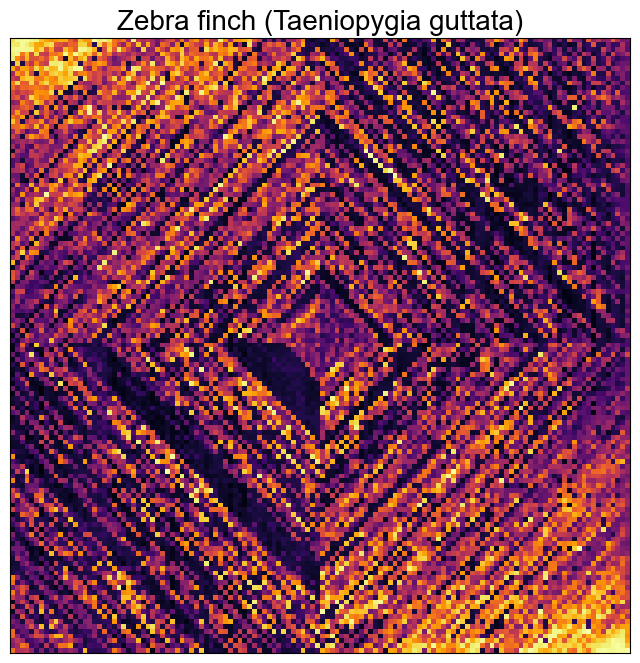

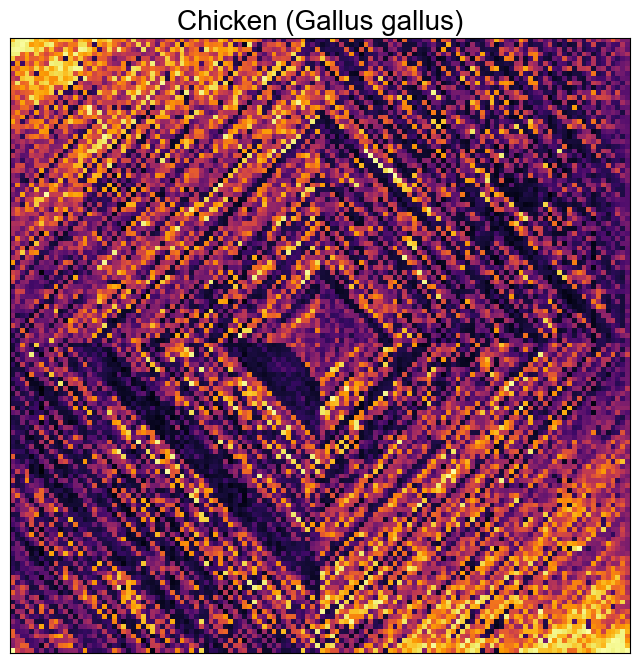

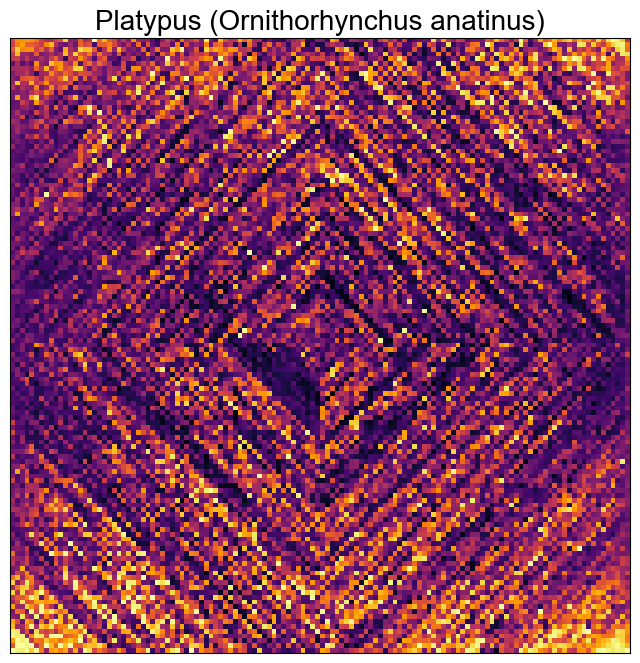

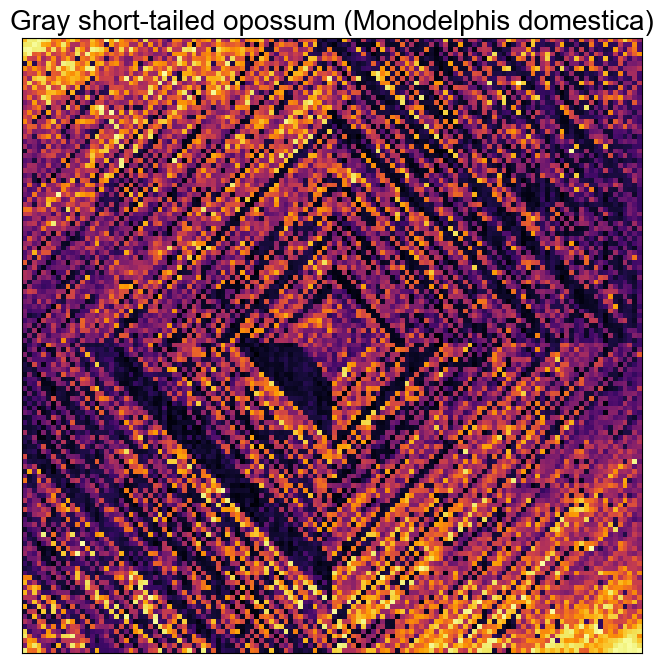

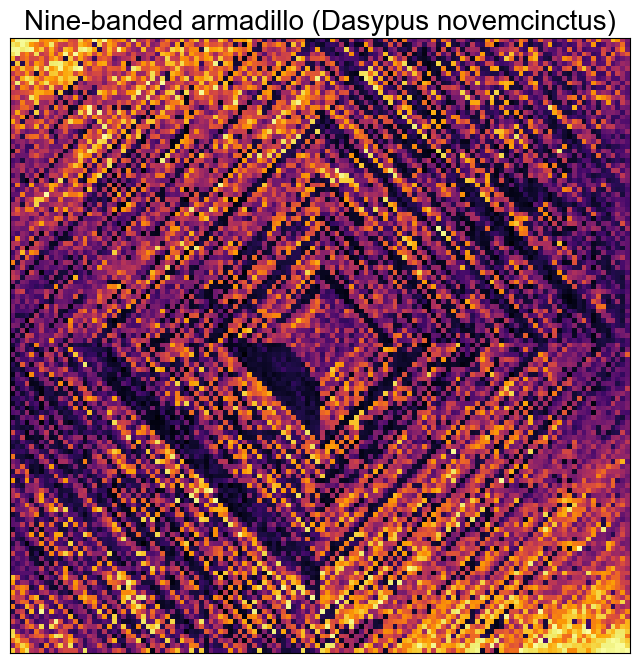

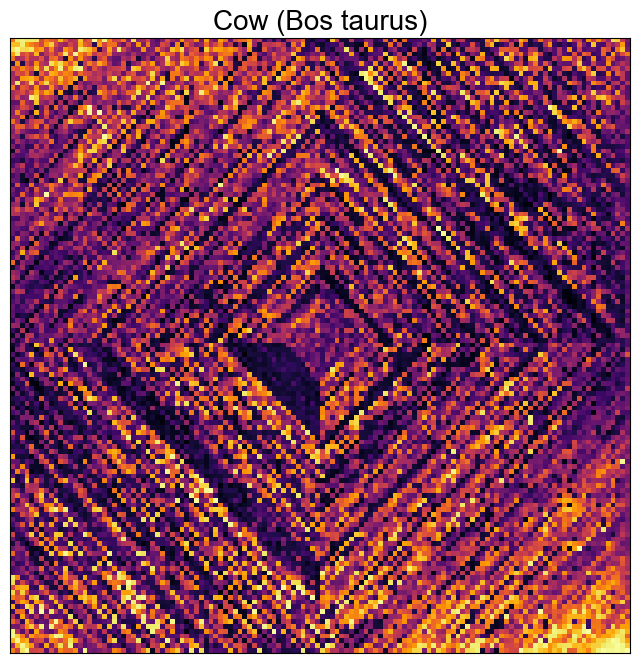

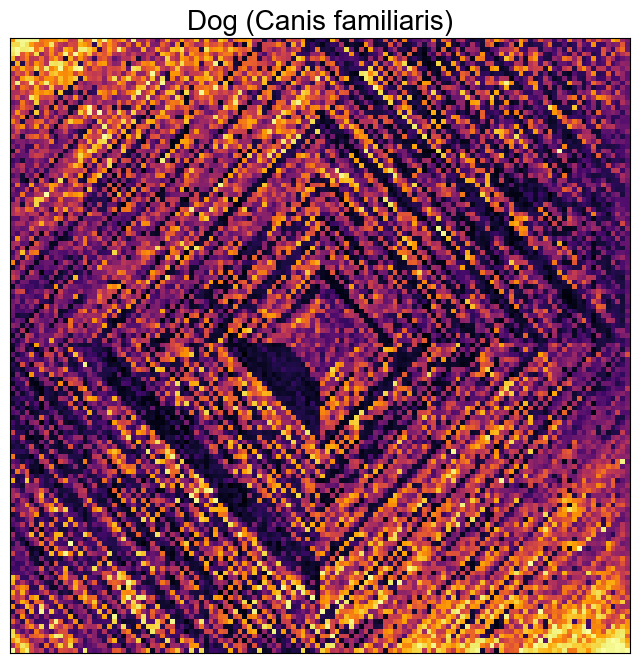

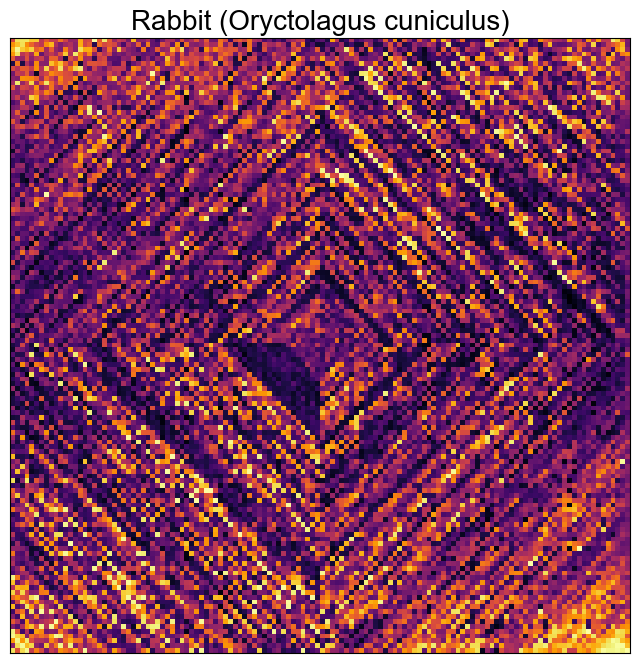

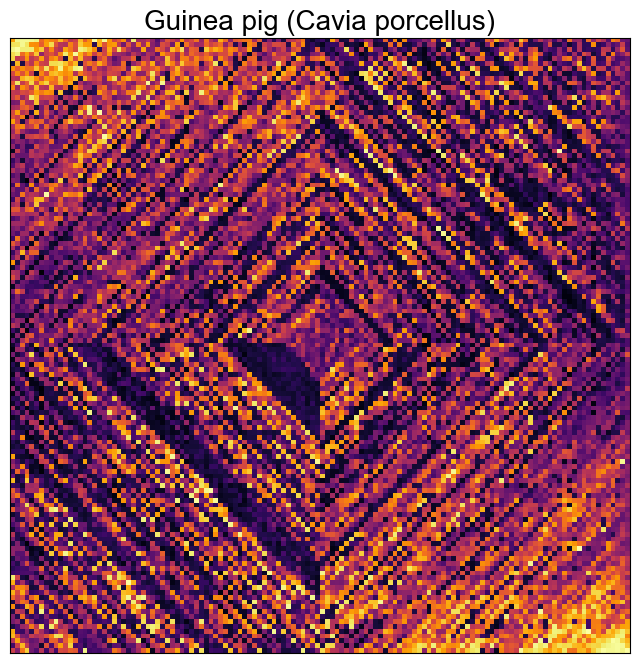

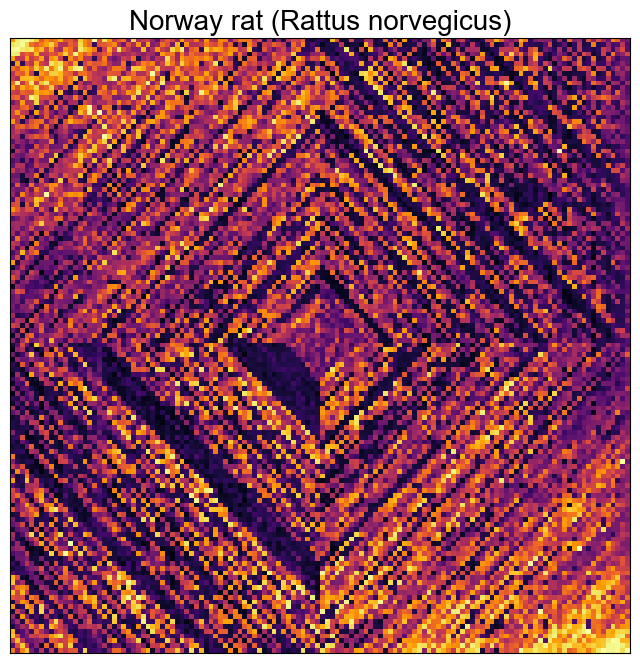

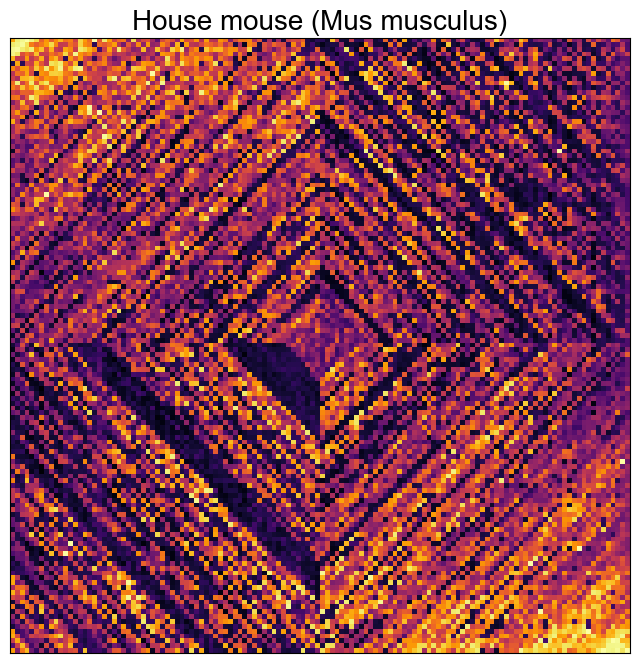

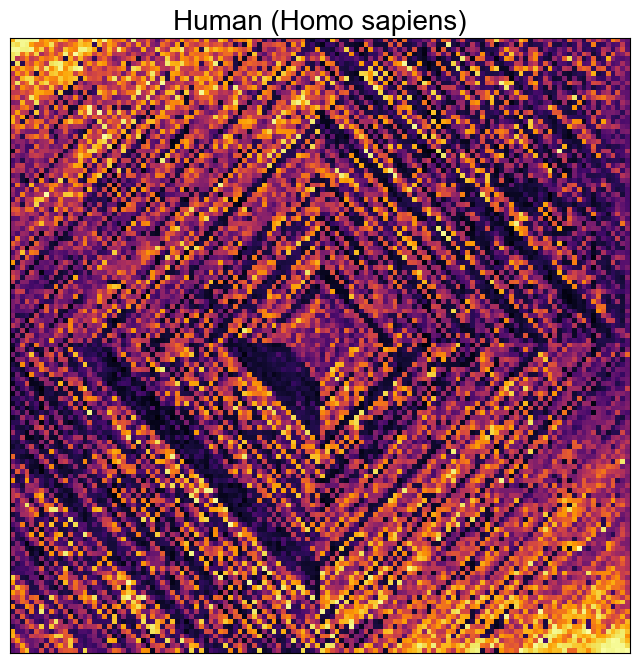

In [16]:
for i in filenames:
    create_heatmap(i[0], i[1])

In [16]:
with imageio.get_writer('Individual Species.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.v2.imread("heatmaps/"+filename +" heatmap.png")
        writer.append_data(image)